In [14]:
#import JSON file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaivijai2001","key":"9e85e112bcaf10cc4f36f5dad06be4cb"}'}

In [15]:
#download the dataset from kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d chetankv/dogs-cats-images

kaggle.json
 98% 427M/435M [00:03<00:00, 156MB/s]
100% 435M/435M [00:03<00:00, 122MB/s]


In [16]:
#Extract the zip file
import zipfile
a=zipfile.ZipFile('/content/dogs-cats-images.zip')
a.extractall()
a.close()

In [17]:
# import Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np

In [19]:
# generators
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/training_set',
                                                 shuffle=True,
                                                 target_size=(64, 64),
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/training_set',
                                                 shuffle=True,
                                                 target_size=(64, 64),
                                                 subset="validation",
                                                 class_mode='binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [20]:
#rescale the image
img_generator = ImageDataGenerator(rescale=1/255)
test_dataset = img_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/test_set',
                                                 shuffle=True,
                                                 target_size=(64, 64),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense

In [24]:
# Initialising the CNN
cnn_svm = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn_svm.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn_svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn_svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn_svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))

cnn_svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn_svm.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_svm.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer

### Everything will be same as normal cnn but the final layer is modified
cnn_svm.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))

In [25]:
cnn_svm.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [26]:
cnn_svm.fit(x=train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
200/200 [==============================] - 56s 270ms/step - loss: 0.9361 - accuracy: 0.5591 - val_loss: 0.8537 - val_accuracy: 0.5263
Epoch 2/10
200/200 [==============================] - 46s 228ms/step - loss: 0.7451 - accuracy: 0.6459 - val_loss: 0.6843 - val_accuracy: 0.6506
Epoch 3/10
200/200 [==============================] - 44s 222ms/step - loss: 0.6436 - accuracy: 0.6925 - val_loss: 0.6401 - val_accuracy: 0.6856
Epoch 4/10
200/200 [==============================] - 49s 243ms/step - loss: 0.5961 - accuracy: 0.7205 - val_loss: 0.6177 - val_accuracy: 0.6856
Epoch 5/10
200/200 [==============================] - 47s 233ms/step - loss: 0.5640 - accuracy: 0.7328 - val_loss: 0.6068 - val_accuracy: 0.7550
Epoch 6/10
200/200 [==============================] - 44s 220ms/step - loss: 0.5113 - accuracy: 0.7619 - val_loss: 0.5607 - val_accuracy: 0.7412
Epoch 7/10
200/200 [==============================] - 50s 248ms/step - loss: 0.4723 - accuracy: 0.7862 - val_loss: 0.5778 - val_ac

In [27]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 133ms/step
[[2.8647747]]


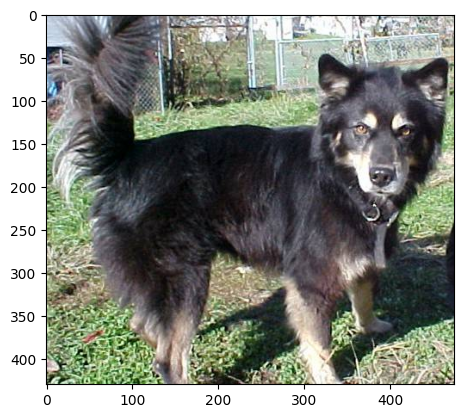

Its a dog


In [29]:
test_image = image.load_img('/content/dog vs cat/dataset/test_set/dogs/dog.4012.jpg', target_size=(64, 64))
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis=0)
result = cnn_svm.predict(test_img)
print(result)
plt.imshow(image.load_img('/content/dog vs cat/dataset/test_set/dogs/dog.4012.jpg'))
plt.show()
if result[0]<=0.5: print('Its a cat')
else: print('Its a dog')

1/1 [==============================] - 0s 179ms/step
[[-1.2177013]]


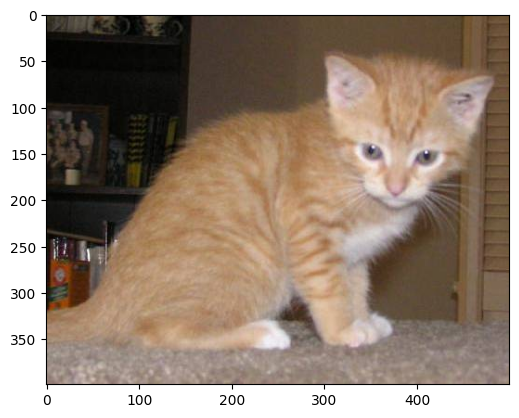

Its a cat


In [31]:
test_image = image.load_img('/content/dog vs cat/dataset/test_set/cats/cat.4003.jpg', target_size=(64, 64))
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis=0)
result = cnn_svm.predict(test_img)
print(result)
plt.imshow(image.load_img('/content/dog vs cat/dataset/test_set/cats/cat.4003.jpg'))
plt.show()
if result[0]<=0.5: print('Its a cat')
else: print('Its a dog')